<a href="https://colab.research.google.com/github/ShreyaliD/Codetch/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Cell 2: Load CIFAR-10 dataset and preprocess

# Load CIFAR-10 dataset (already split into train and test)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the image data by scaling pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check the shape of the data
print(x_train.shape, x_test.shape)  # (50000, 32, 32, 3) for train, (10000, 32, 32, 3) for test

(50000, 32, 32, 3) (10000, 32, 32, 3)


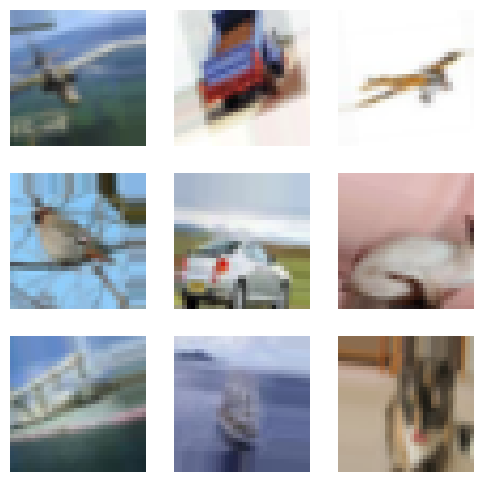

In [ ]:
# Cell 3: Image Augmentation

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation of images
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shear transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flips
    fill_mode='nearest'     # Fill empty pixels after transformations
)

# Fit the generator to the training data
datagen.fit(x_train)

# Visualize a few augmented images
augmented_images = next(datagen.flow(x_train, batch_size=9))

# Plot a few augmented images
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for ax, img in zip(axes.ravel(), augmented_images):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
# Cell 4: Build a CNN Model from Scratch

model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Fully Connected Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Summarize the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Cell 5: Compile the CNN Model

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy as a metric
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 126ms/step - accuracy: 0.2575 - loss: 1.9795 - val_accuracy: 0.4327 - val_loss: 1.5261
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 125ms/step - accuracy: 0.4082 - loss: 1.6154 - val_accuracy: 0.5256 - val_loss: 1.3063
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 125ms/step - accuracy: 0.4662 - loss: 1.4696 - val_accuracy: 0.5329 - val_loss: 1.3045


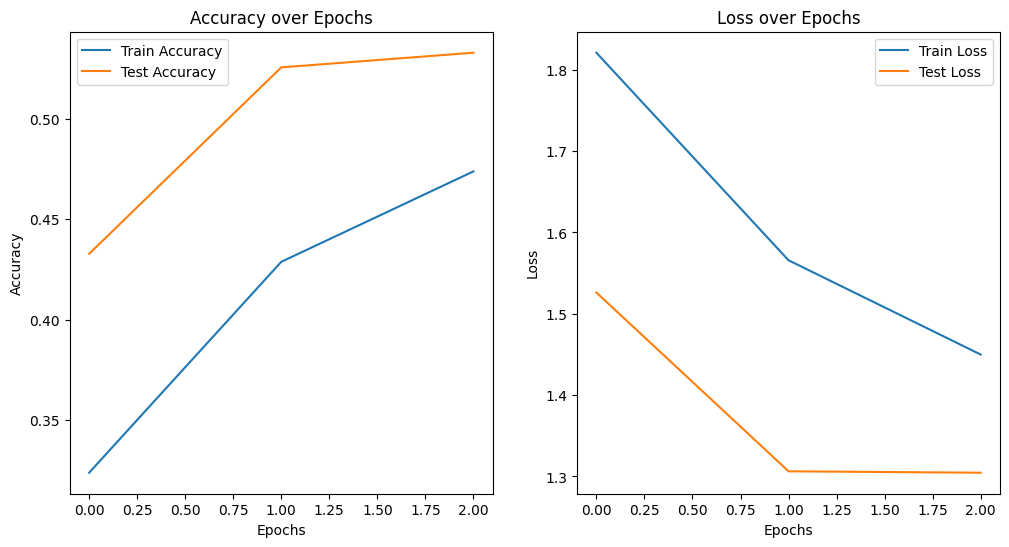

In [ ]:
# Cell 6: Train the CNN Model

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=3,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Cell 7: Transfer Learning with VGG16

# Load the VGG16 model pretrained on ImageNet without the top (fully connected layers)
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of VGG16 to avoid retraining them
vgg16_base.trainable = False

# Build the model using the VGG16 base and add custom layers
model_vgg = models.Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the new model
model_vgg.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Summary of the model architecture
model_vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 719s 920ms/step - accuracy: 0.3746 - loss: 1.7733 - val_accuracy: 0.5220 - val_loss: 1.3648
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 742s 920ms/step - accuracy: 0.4863 - loss: 1.4609 - val_accuracy: 0.5283 - val_loss: 1.3364


Text(0.5, 1.0, 'Loss over Epochs (Transfer Learning)')

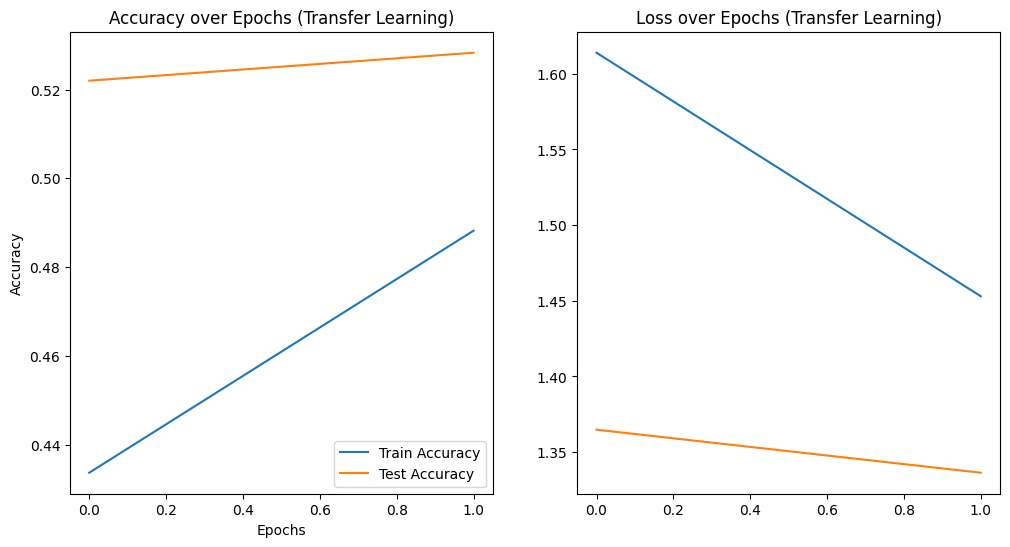

In [ ]:
# Cell 8: Train the Transfer Learning Model

# Train the model
history_vgg = model_vgg.fit(datagen.flow(x_train, y_train, batch_size=64),
                            epochs=2,
                            validation_data=(x_test, y_test),
                            callbacks=[early_stopping])

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs (Transfer Learning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs (Transfer Learning)')

In [ ]:
# Cell 9: Display Accuracy and Loss in Numerical Format

# Get the final accuracy and loss for training and validation data
train_accuracy = history_vgg.history['accuracy'][-1]
val_accuracy = history_vgg.history['val_accuracy'][-1]
train_loss = history_vgg.history['loss'][-1]
val_loss = history_vgg.history['val_loss'][-1]

# Print the results in a formatted manner
print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

Final Training Accuracy: 48.82%
Final Validation Accuracy: 52.83%
Final Training Loss: 1.4530
Final Validation Loss: 1.3364
